In [1]:
from pycollisiondb.pycollisiondb import PyCollision
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# The official ALADDIN2 server.
#DB_URL = 'https://db-amdis.org/aladdin2/'
# The official CollisionDB server.
DB_URL = 'https://db-amdis.org/collisiondb/'
# Local URL for whatever service is listening on port 8282.
#DB_URL = 'http://127.0.0.1:8282/'

In [3]:
# Fetch datasets from the server over the API.
# Proton-impact ionization of H.
query = {'reactants': ['H+', 'H'],
         'process_types': ['HIN'],
         'data_type': 'cross section'}
pycoll = PyCollision.get_datasets(query=query, DB_URL=DB_URL)

# If you're accessing a locally-cached archive instead, do it here.
#DATA_DIR = '/Users/christian/www/colldb_results'
#archive_uuid = '026a7abd-5ed7-4e30-827d-f3f606f3fa98'
#pycoll = PyCollision.get_datasets(archive_uuid=archive_uuid, DATA_DIR=DATA_DIR)

In [4]:
# How many did we get?
len(pycoll.datasets)

18

In [5]:
# What are they (a dict, keyed by pk ID).
pycoll.datasets

{102737: D102737: H+ + H 1s → H+ + H+ + e-,
 102738: D102738: H+ + H 2s → H+ + H+ + e-,
 102739: D102739: H+ + H 2p → H+ + H+ + e-,
 102740: D102740: H+ + H 3s → H+ + H+ + e-,
 102741: D102741: H+ + H 3p → H+ + H+ + e-,
 102742: D102742: H+ + H 3d → H+ + H+ + e-,
 103103: D103103: H 1s + H+ → H+ + H+ + e-,
 103104: D103104: H 1s + H+ → H+ + H+ + e-,
 106651: D106651: H+ + H n=10 → H+ + H+ + e-,
 106652: D106652: H+ + H n=1 → H+ + H+ + e-,
 106653: D106653: H+ + H n=2 → H+ + H+ + e-,
 106654: D106654: H+ + H n=3 → H+ + H+ + e-,
 106655: D106655: H+ + H n=4 → H+ + H+ + e-,
 106656: D106656: H+ + H n=5 → H+ + H+ + e-,
 106657: D106657: H+ + H n=6 → H+ + H+ + e-,
 106658: D106658: H+ + H n=7 → H+ + H+ + e-,
 106659: D106659: H+ + H n=8 → H+ + H+ + e-,
 106660: D106660: H+ + H n=9 → H+ + H+ + e-}

In [6]:
# Resolve the references from the datasets into proper, citeable format.
# NB this accesses the pyref API.
pycoll.resolve_refs()
# e.g.
pycoll.refs['B33']

{'authors': 'M. B Shah, H. B Gilbody',
 'title': 'Experimental study of the ionisation of atomic hydrogen by fast H<sup>+</sup>and He<sup>2+</sup>ions',
 'journal': 'Journal of Physics B: Atomic and Molecular Physics',
 'volume': '14',
 'page_start': '2361',
 'page_end': '2377',
 'article_number': '',
 'year': 1981,
 'note': '',
 'doi': '10.1088/0022-3700/14/14/009',
 'bibcode': '1981JPhB...14.2361S',
 'url': 'https://dx.doi.org/10.1088/0022-3700/14/14/009'}

In [8]:
for ds in pycoll.datasets.values():
    print(ds.metadata['refs'])

{'B32': {'doi': '10.1016/j.adt.2019.05.002'}}
{'B32': {'doi': '10.1016/j.adt.2019.05.002'}}
{'B32': {'doi': '10.1016/j.adt.2019.05.002'}}
{'B32': {'doi': '10.1016/j.adt.2019.05.002'}}
{'B32': {'doi': '10.1016/j.adt.2019.05.002'}}
{'B32': {'doi': '10.1016/j.adt.2019.05.002'}}
{'B33': {'doi': '10.1088/0022-3700/14/14/009'}}
{'B34': {'doi': '10.1088/0022-3700/20/11/016'}}
{'B38': {'note': 'ADAS-C(09)01'}}
{'B37': {'note': 'IAEA-APID-4 (1993)'}}
{'B38': {'note': 'ADAS-C(09)01'}}
{'B38': {'note': 'ADAS-C(09)01'}}
{'B38': {'note': 'ADAS-C(09)01'}}
{'B38': {'note': 'ADAS-C(09)01'}}
{'B38': {'note': 'ADAS-C(09)01'}}
{'B38': {'note': 'ADAS-C(09)01'}}
{'B38': {'note': 'ADAS-C(09)01'}}
{'B38': {'note': 'ADAS-C(09)01'}}


<IPython.core.display.Javascript object>


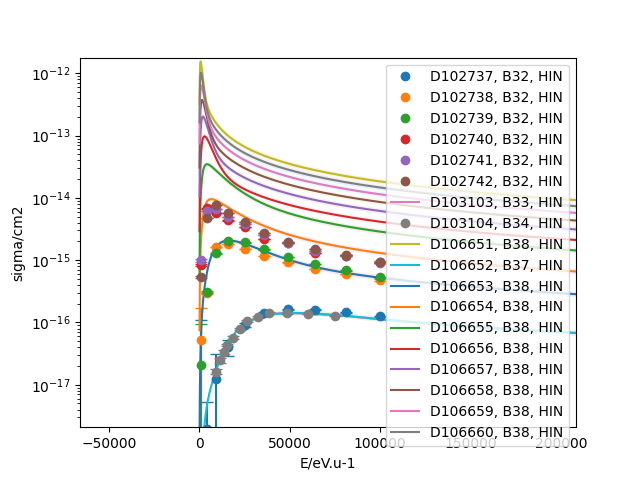

In [10]:
# Make a plot, indicating how the data should be labelled.
fig, ax = plt.subplots()
#pycoll.plot_all_datasets(ax, label=('reaction', 'qid', 'refs', 'process_types'))
pycoll.plot_all_datasets(ax, label=('qid', 'refs', 'process_types'))
plt.legend()